In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle as cPickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score,roc_auc_score
import sklearn.metrics as metrics
from keras import models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_test = "/content/drive/MyDrive/CLGPT_Kcr/data/"
path_model = "/content/drive/MyDrive/CLGPT_Kcr/Model/"
path_result = "/content/drive/MyDrive/CLGPT_Kcr/Result/"


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class ProteinDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
import pandas as pd
# Định nghĩa đường dẫn dữ liệu
test_path = path_test + 'test_data.csv'
# Hàm chuyển đổi chuỗi thành K-mer
def k_mer_sentence(sequence, k):
    return " ".join(sequence[i:i + k] for i in range(len(sequence) - k + 1))
# Xử lý dữ liệu test
def process_test_data(test_path, k):
    df_test = pd.read_csv(test_path)
    df_test['n_gram'] = df_test['Sequence'].apply(lambda seq: k_mer_sentence(seq, k))
    X_test, y_test = df_test['n_gram'], df_test['Label']
    return X_test, y_test
# Thực hiện tiền xử lý với n-gram = 1
n = 1
Xtest, ytest = process_test_data(test_path, n)

In [ ]:
Xtest

,n_gram
0,L E K E L F R E M E S I L Q N K H L D V E K I ...
1,S S T A S S M E L E E L R H E K E M Q R E E I ...
2,K R A A L Q A L K R K K R Y E K Q L A Q I D G ...
3,S L S A Q L S Q L Q K Q L A A K E A K L R D L ...
4,S L E E E V S I L N R Q V L E K E G E S K E L ...
...,...
5973,A A K K P K K A T G A A T P K K S A K K T P K ...
5974,E E P P P A R S G S G G G S A K E P Q E E R S ...
5975,Q R K E R M L Q D L L S D R N K Q V L E H E M ...
5976,S N E T P K K K K K R F S F K K S F K L S G F ...


In [ ]:
# load test data
def twoTupleDic1():
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']

    AA_dict = {}
    numm = 1
    for i in AA_list_sort:
        AA_dict[i] = numm
        numm += 1
    return AA_dict
def ProSentence(pro, K):
	sentence = ""
	length = len(pro)
	for i in range(length - K + 1):
		sentence += pro[i: i + K] + " "
    #delete extra space
	sentence = sentence[0 : len(sentence) - 1]
	return sentence
k =1#1-gram
word_index1 = twoTupleDic1()
vocab_size = len(word_index1)
# load test data
file_test ="test_data.csv"
df_test =pd.read_csv(path_test +file_test,delimiter= ',')
text_test =[] #PTMsequend kmer
for i in df_test['Sequence']:
  temp = ProSentence(i,k)
  text_test.append(temp)
df_test['k_mer'] =text_test

text_test =[] #PTMsequend kmer
for i in df_test['Sequence']:
  temp = ProSentence(i,k) #
  text_test.append(temp)
df_test['k_mer'] =text_test
test_sequences = []
for each in text_test:
    each_index_list = []
    each = each.split(' ')
    for i in each:
        each_index_list.append(word_index1[i])
    test_sequences.append(each_index_list)
data_token = []
for i in df_test['k_mer']:
   data_token.append(i.split())
print(data_token[:2])
MAX_SEQUENCE_LENGTH = len(data_token[1])
Xtest1 = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
ytest1= df_test['Label']

[['L', 'E', 'K', 'E', 'L', 'F', 'R', 'E', 'M', 'E', 'S', 'I', 'L', 'Q', 'N', 'K', 'H', 'L', 'D', 'V', 'E', 'K', 'I', 'V', 'N', 'L', 'F', 'P', 'Q', 'C', 'T'], ['S', 'S', 'T', 'A', 'S', 'S', 'M', 'E', 'L', 'E', 'E', 'L', 'R', 'H', 'E', 'K', 'E', 'M', 'Q', 'R', 'E', 'E', 'I', 'Q', 'K', 'L', 'M', 'G', 'Q', 'I', 'H']]


In [ ]:
from keras import models
model_CNN3 = models.load_model(path_model +"CNN_3.h5")
y_prob_CNN3 = model_CNN3.predict(Xtest1)
y_pred = model_CNN3.predict(Xtest1)
y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest1)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)


187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ACC, MCC, SN, SP: 0.8143191702910673 0.62867901478229 0.8200066912010706 0.8086316493810639
[[2417  572]
 [ 538 2451]]


In [ ]:
from keras import models
model_Bi_LSTM = models.load_model(path_model +"Bi-LSTM.h5")
y_prob_Bi_LSTM = model_Bi_LSTM.predict(Xtest1)
y_pred = model_Bi_LSTM.predict(Xtest1)
y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest1)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
ACC, MCC, SN, SP: 0.8338909334225494 0.6681053369572988 0.8494479759116762 0.8183338909334226
[[2446  543]
 [ 450 2539]]


In [ ]:
#GPT predict
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from transformers import set_seed, GPT2Config, GPT2Tokenizer, GPT2ForSequenceClassification

# Đặt seed để tái tạo kết quả
set_seed(731)  # My Birthday!

# Cấu hình mô hình GPT-2 cho bài toán phân loại nhị phân
model_configGPT = GPT2Config.from_pretrained('gpt2', num_labels=2)
modelGPT = GPT2ForSequenceClassification.from_pretrained('gpt2', config=model_configGPT)

# Cấu hình tokenizer
tokenizerGPT = GPT2Tokenizer.from_pretrained('gpt2')
tokenizerGPT.padding_side = "left"  # Rất quan trọng cho GPT-2
tokenizerGPT.pad_token = tokenizerGPT.eos_token

# Điều chỉnh kích thước embeddings
modelGPT.resize_token_embeddings(len(tokenizerGPT))
modelGPT.config.pad_token_id = modelGPT.config.eos_token_id

# Tìm mô hình có AUC cao nhất đã lưu
best_model_path = path_model
for file in os.listdir(path_model):
    if file.startswith("2.7.Model_CL_GPT2_Kcr") and file.endswith(".pth"):
        best_model_path = os.path.join(path_model, file)
        print(f"Tìm thấy mô hình tốt nhất: {best_model_path}")
        break

if best_model_path is None:
    raise FileNotFoundError("Không tìm thấy mô hình tốt nhất trong result_path!")

# Load mô hình đã lưu
modelGPT.load_state_dict(torch.load(best_model_path, map_location=torch.device('cpu')))
modelGPT.eval()

# Chuẩn bị dữ liệu test
independent_dataGPT = Xtest.tolist()
independent_labelsGPT = ytest.tolist()

# Tokenize dữ liệu
test_encodingsGPT = tokenizerGPT(independent_dataGPT, truncation=True, padding=True, max_length=512, return_tensors="pt")

# Dự đoán
with torch.no_grad():
    outputs = modelGPT(**test_encodingsGPT)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predsGPT = probabilities.argmax(dim=-1).numpy()
    probasGPT = probabilities[:, 1].numpy()  # Xác suất lớp 1

# Tính AUC
fprGPT, tprGPT, _ = roc_curve(independent_labelsGPT, probasGPT)
auc_scoreGPT = auc(fprGPT, tprGPT)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Tìm thấy mô hình tốt nhất: /content/drive/MyDrive/GPT2_Bert_Kcr/Model/2.7.Model_CL_GPT2_Kcr.pth


In [ ]:
import pandas as pd
# Định nghĩa đường dẫn dữ liệu
test_path = path_test + 'test_data.csv'
# Hàm chuyển đổi chuỗi thành K-mer
def k_mer_sentence(sequence, k):
    return " ".join(sequence[i:i + k] for i in range(len(sequence) - k + 1))
# Xử lý dữ liệu test
def process_test_data(test_path, k):
    df_test = pd.read_csv(test_path)
    df_test['n_gram'] = df_test['Sequence'].apply(lambda seq: k_mer_sentence(seq, k))
    X_test, y_test = df_test['n_gram'], df_test['Label']
    return X_test, y_test
# Thực hiện tiền xử lý với n-gram = 1
n = 1
X_test, y_test = process_test_data(test_path, n)

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from transformers import set_seed, GPT2Config, GPT2Tokenizer, GPT2ForSequenceClassification

# ==== Cấu hình ====
set_seed(731)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ==== Khởi tạo tokenizer ====
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token

# ==== Định nghĩa mô hình (tương ứng với lúc train) ====
config = GPT2Config(
    vocab_size=tokenizer.vocab_size,
    n_positions=768,
    n_ctx=768,
    n_embd=768,
    n_layer=12,
    n_head=8,
    num_labels=2,
    pad_token_id=tokenizer.pad_token_id
)
model = GPT2ForSequenceClassification(config)
model.resize_token_embeddings(len(tokenizer))
model.config.pad_token_id = model.config.eos_token_id
model.to(device)

# ==== Load mô hình tốt nhất ====
best_model_path = path_model
for file in os.listdir(path_model):
    if file.startswith("4.7.Model_CL_GPT2_Kcr") and file.endswith(".pth"):
        best_model_path = os.path.join(path_model, file)
        print(f" Tìm thấy mô hình tốt nhất: {best_model_path}")
        break

if best_model_path is None:
    raise FileNotFoundError(" Không tìm thấy mô hình tốt nhất trong result_path!")

model.load_state_dict(torch.load(best_model_path, map_location=device))
model.eval()

# ==== Dữ liệu kiểm thử độc lập ====
# Bạn cần thay bằng dữ liệu thực
# Ví dụ:
# X_test = pd.Series([...])
# y_test = pd.Series([...])

independent_data = X_test.tolist()
independent_labels = y_test.tolist()

# ==== Token hóa dữ liệu kiểm thử ====
test_encodings = tokenizer(
    independent_data,
    truncation=True,
    padding=True,
    max_length=31,
    return_tensors="pt"
)
test_encodings = {k: v.to(device) for k, v in test_encodings.items()}

# ==== Dự đoán ====
with torch.no_grad():
    outputs = model(**test_encodings)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    preds = probabilities.argmax(dim=-1).cpu().numpy()
    probas = probabilities[:, 1].cpu().numpy()  # Xác suất class 1

# ==== Đánh giá ====
conf_matrix = confusion_matrix(independent_labels, preds)
TN, FP, FN, TP = conf_matrix.ravel()


fprGPT, tprGPT, _ = roc_curve(independent_labels, probas)
auc_scoreGPT =auc(fprGPT, tprGPT)


 Tìm thấy mô hình tốt nhất: /content/drive/MyDrive/GPT2_Bert_Kcr/Model/4.7.Model_CL_GPT2_Kcr.pth


In [ ]:
#Model Bert predict
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from transformers import BertTokenizer, BertForSequenceClassification

# Tìm mô hình có AUC cao nhất đã lưu
best_model_path = path_model
for file in os.listdir(path_model):
    if file.startswith("Model_CL_Best_Kcr") and file.endswith(".pth"):
        best_model_path = os.path.join(path_model, file)
        print(f"Tìm thấy mô hình tốt nhất: {best_model_path}")
        break

if best_model_path is None:
    raise FileNotFoundError("Không tìm thấy mô hình tốt nhất trong result_path!")

# Load tokenizer và mô hình
tokenizerBert = BertTokenizer.from_pretrained('bert-base-uncased')
modelBert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
modelBert.load_state_dict(torch.load(best_model_path, map_location=torch.device('cpu')))  # Load trên CPU hoặc GPU
modelBert.eval()  # Chuyển sang chế độ đánh giá

# Chuẩn bị dữ liệu test

independent_dataBert = Xtest.tolist()
independent_labelsBert =ytest.tolist()

# Tokenize dữ liệu
test_encodingsBert = tokenizerBert(independent_dataBert, truncation=True, padding=True, max_length=512, return_tensors="pt")

# Dự đoán
with torch.no_grad():
    outputs = modelBert(**test_encodingsBert)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predsBert = probabilities.argmax(dim=-1).numpy()
    probasBert = probabilities[:, 1].numpy()  # Xác suất lớp 1

# Tính AUC
fprBert, tprBert, _ = roc_curve(independent_labelsBert, probasBert)
auc_scoreBert = auc(fprBert, tprBert)


In [ ]:
import numpy as np
from sklearn import metrics

y_true = ytest1

# Kiểm tra số chiều trước khi lấy cột thứ 2
def get_positive_probs(y_prob):
    return y_prob[:, 1] if len(y_prob.shape) > 1 else y_prob

y_prob_CNN3 = get_positive_probs(y_prob_CNN3)
y_prob_Bi_LSTM = get_positive_probs(y_prob_Bi_LSTM)


# Tính ROC và AUC cho từng mô hình
fpr_CNN3, tpr_CNN3, _ = metrics.roc_curve(y_true, y_prob_CNN3)
roc_auc_CNN3 = metrics.auc(fpr_CNN3, tpr_CNN3)

fpr_Bi_LSTM, tpr_Bi_LSTM, _ = metrics.roc_curve(y_true, y_prob_Bi_LSTM)
roc_auc_Bi_LSTM = metrics.auc(fpr_Bi_LSTM, tpr_Bi_LSTM)



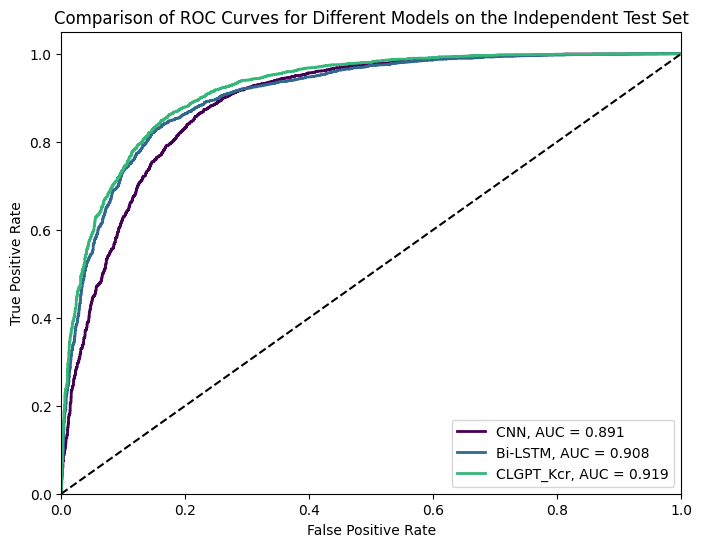

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 4))  # Tạo đủ 7 màu cho 7 mô hình

for (fpr, tpr, auc_value, label, color) in zip(
    [fpr_CNN3, fpr_Bi_LSTM, fprGPT],
    [tpr_CNN3, tpr_Bi_LSTM, tprGPT],
    [roc_auc_CNN3, roc_auc_Bi_LSTM, auc_scoreGPT],
    ['CNN', 'Bi-LSTM', 'CLGPT_Kcr'],
    colors
):
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{label}, AUC = {auc_value:.3f}')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves for Different Models on the Independent Test Set')
plt.legend(loc="lower right")
plt.show()